 -----------------------------------------------------------------------------------------------------------------------

GRUPO: 

Magda Costa - up202207036

Rafael Pacheco - up202206258

Sofia Machado - up202207203

 -----------------------------------------------------------------------------------------------------------------------

# Machine Learning I (CC2008) - Practical Assignment

## Índice  <a name = "indice"></a>
1. [Introdução](#introduçao)
2. [Análise Datasets](#tratamento)
    - [Weather](#weather)
    - [Fertility](#fertility)
    - [Lupus](#lupus)
    - [Haberman](#haberman)
    - [Sa_heart](#heart)
    - [Liver Disorders](#liver)
    - [Blood Transfusion](#blood)
    - [Breast_w](#breast)
    - [Diabetes](#diabetes)
3. [Conclusão da Limpeza de Dados](#conclusao)

# Introdução <a name = "introdução"></a>
[[voltar ao índice]](#indice)

Nesta parte do trabalho vamos analisar cada dataset. Deste modo será possivel determinar quais as peculiariedades de cada um. Para esse efeito em cada dataset serão analisados os seguintes aspetos, se necessário:

    - Análise geral dos dados (ver o tipo de dados de cada dataset)
    - Missing values
    - Análise de 'Class'
    - Classes Desbalanceadas
    - Visualização dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Análise Datasets<a name = "tratamento"></a>
[[voltar ao índice]](#indice)

## Weather<a name = "weather"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [2]:
# Leitura do dataset 'transplant'
df_weather = pd.read_csv("ds/weather.csv")

In [3]:
# Visualização de parte do dataset
df_weather.head()

ID   Weather  Temp  Humidity  Windy Play
0   1     sunny    85        85  False   no
1   2     sunny    80        90   True   no
2   3  overcast    83        86  False  yes
3   4     rainy    70        96  False  yes
4   5     rainy    68        80  False  yes

In [4]:
print(df_weather.dtypes)

ID           int64
Weather     object
Temp         int64
Humidity     int64
Windy         bool
Play        object
dtype: object


Existem 3 features.

### 2. Missing Values

In [5]:
print(df_weather.isnull().sum())

ID          0
Weather     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64


Concluimos que não há valores nulos.

### 3. Análise de 'CLASS'

In [6]:
# Mudar a designação da coluna
df_weather = df_weather.rename(columns={'Play': 'CLASS'})

In [7]:
print(df_weather['CLASS'].unique())

['no' 'yes']


Vamos mudar a coluna 'CLASS' de modo a que este seja composta por inteiros em vez de objetos.

In [8]:
# Mudar todos os dados para valores numéricos:
colunas = ['Weather', 'Windy', 'CLASS']

for col in colunas:
    list_diff = df_weather[col].unique()
    subs = {}
    for i in range(len(list_diff)):
        subs[list_diff[i]] = i
    df_weather[col] = df_weather[col].map(subs)

In [9]:
df_weather

ID  Weather  Temp  Humidity  Windy  CLASS
0    1        0    85        85      0      0
1    2        0    80        90      1      0
2    3        1    83        86      0      1
3    4        2    70        96      0      1
4    5        2    68        80      0      1
5    6        2    65        70      1      0
6    7        1    64        65      1      1
7    8        0    72        95      0      0
8    9        0    69        70      0      1
9   10        2    75        80      0      1
10  11        0    75        70      1      1
11  12        1    72        90      1      1
12  13        1    81        75      0      1
13  14        2    71        91      1      0

### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [10]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_weather['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_weather['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
1    9
0    5
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
1    64.285714
0    35.714286
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [11]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_weather.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

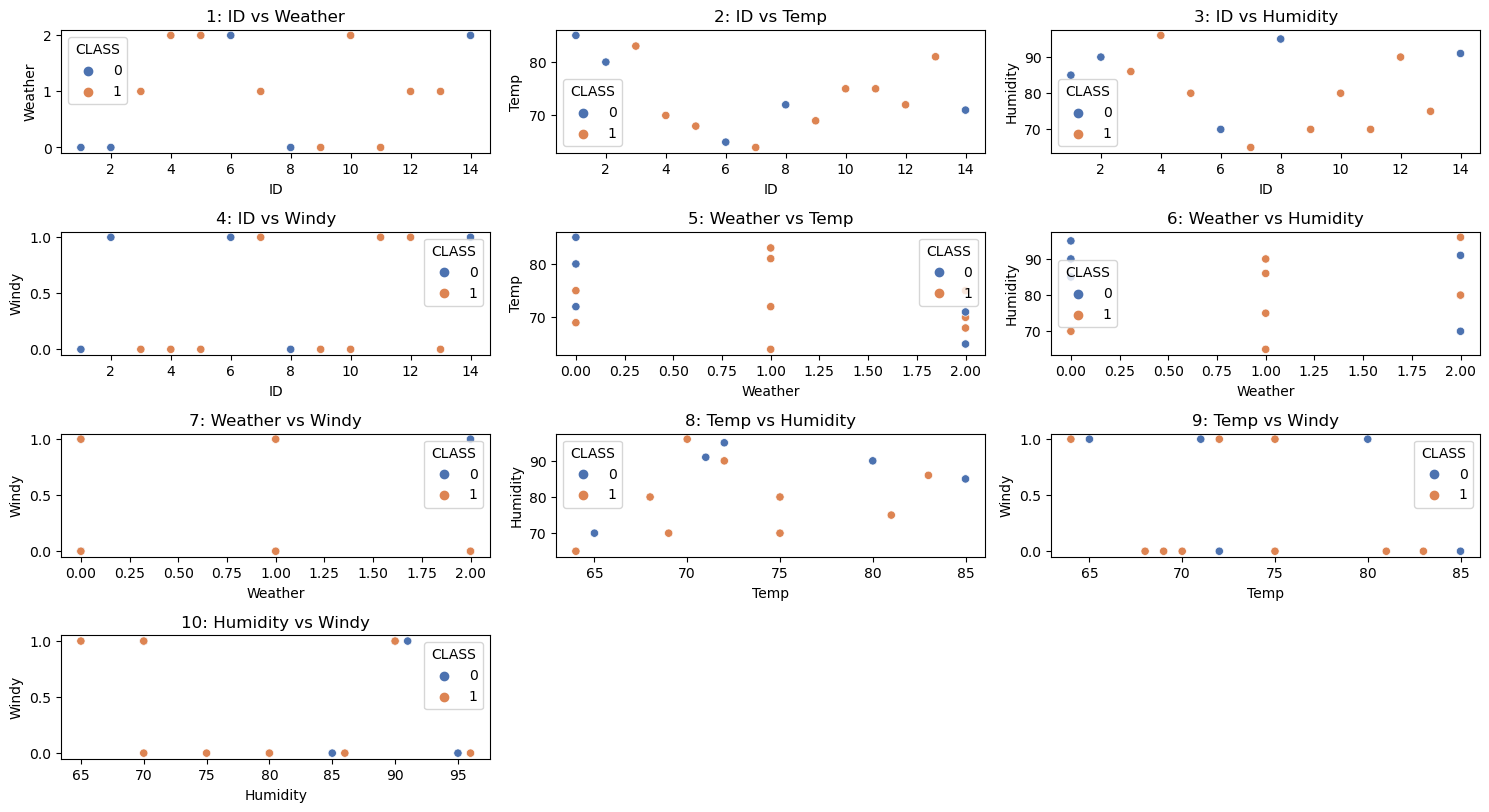

In [12]:
X = df_weather[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_weather['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Fertility<a name = "fertility"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [13]:
# Leitura do dataset 'fertility'
df_fertility = pd.read_csv("ds/fertility.csv")

In [14]:
# Visualização de parte do dataset
df_fertility.head()

V1    V2  V3  V4  V5  V6   V7  V8    V9  CLASS
0 -0.33  0.69   0   1   1   0  0.8   0  0.88      1
1 -0.33  0.94   1   0   1   0  0.8   1  0.31      2
2 -0.33  0.50   1   0   0   0  1.0  -1  0.50      1
3 -0.33  0.75   0   1   1   0  1.0  -1  0.38      1
4 -0.33  0.67   1   1   0   0  0.8  -1  0.50      2

In [15]:
print(df_fertility.dtypes)

V1       float64
V2       float64
V3         int64
V4         int64
V5         int64
V6         int64
V7       float64
V8         int64
V9       float64
CLASS      int64
dtype: object


Existem 9 features.

### 2. Missing Values

In [16]:
print(df_fertility.isnull().sum())

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
CLASS    0
dtype: int64


Não há valores em falta.

### 3. Análise de 'CLASS'

In [17]:
print(df_fertility['CLASS'].unique())

[1 2]


Vamos mudar a coluna 'CLASS' de modo a que esta seja composta por [0 1] em vez de [1 2].

In [18]:
df_fertility['CLASS'] = df_fertility['CLASS'].map({1:0, 2:1})
print(df_fertility['CLASS'].unique())

[0 1]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [19]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_fertility['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_fertility['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    88
1    12
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    88.0
1    12.0
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [20]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_fertility.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

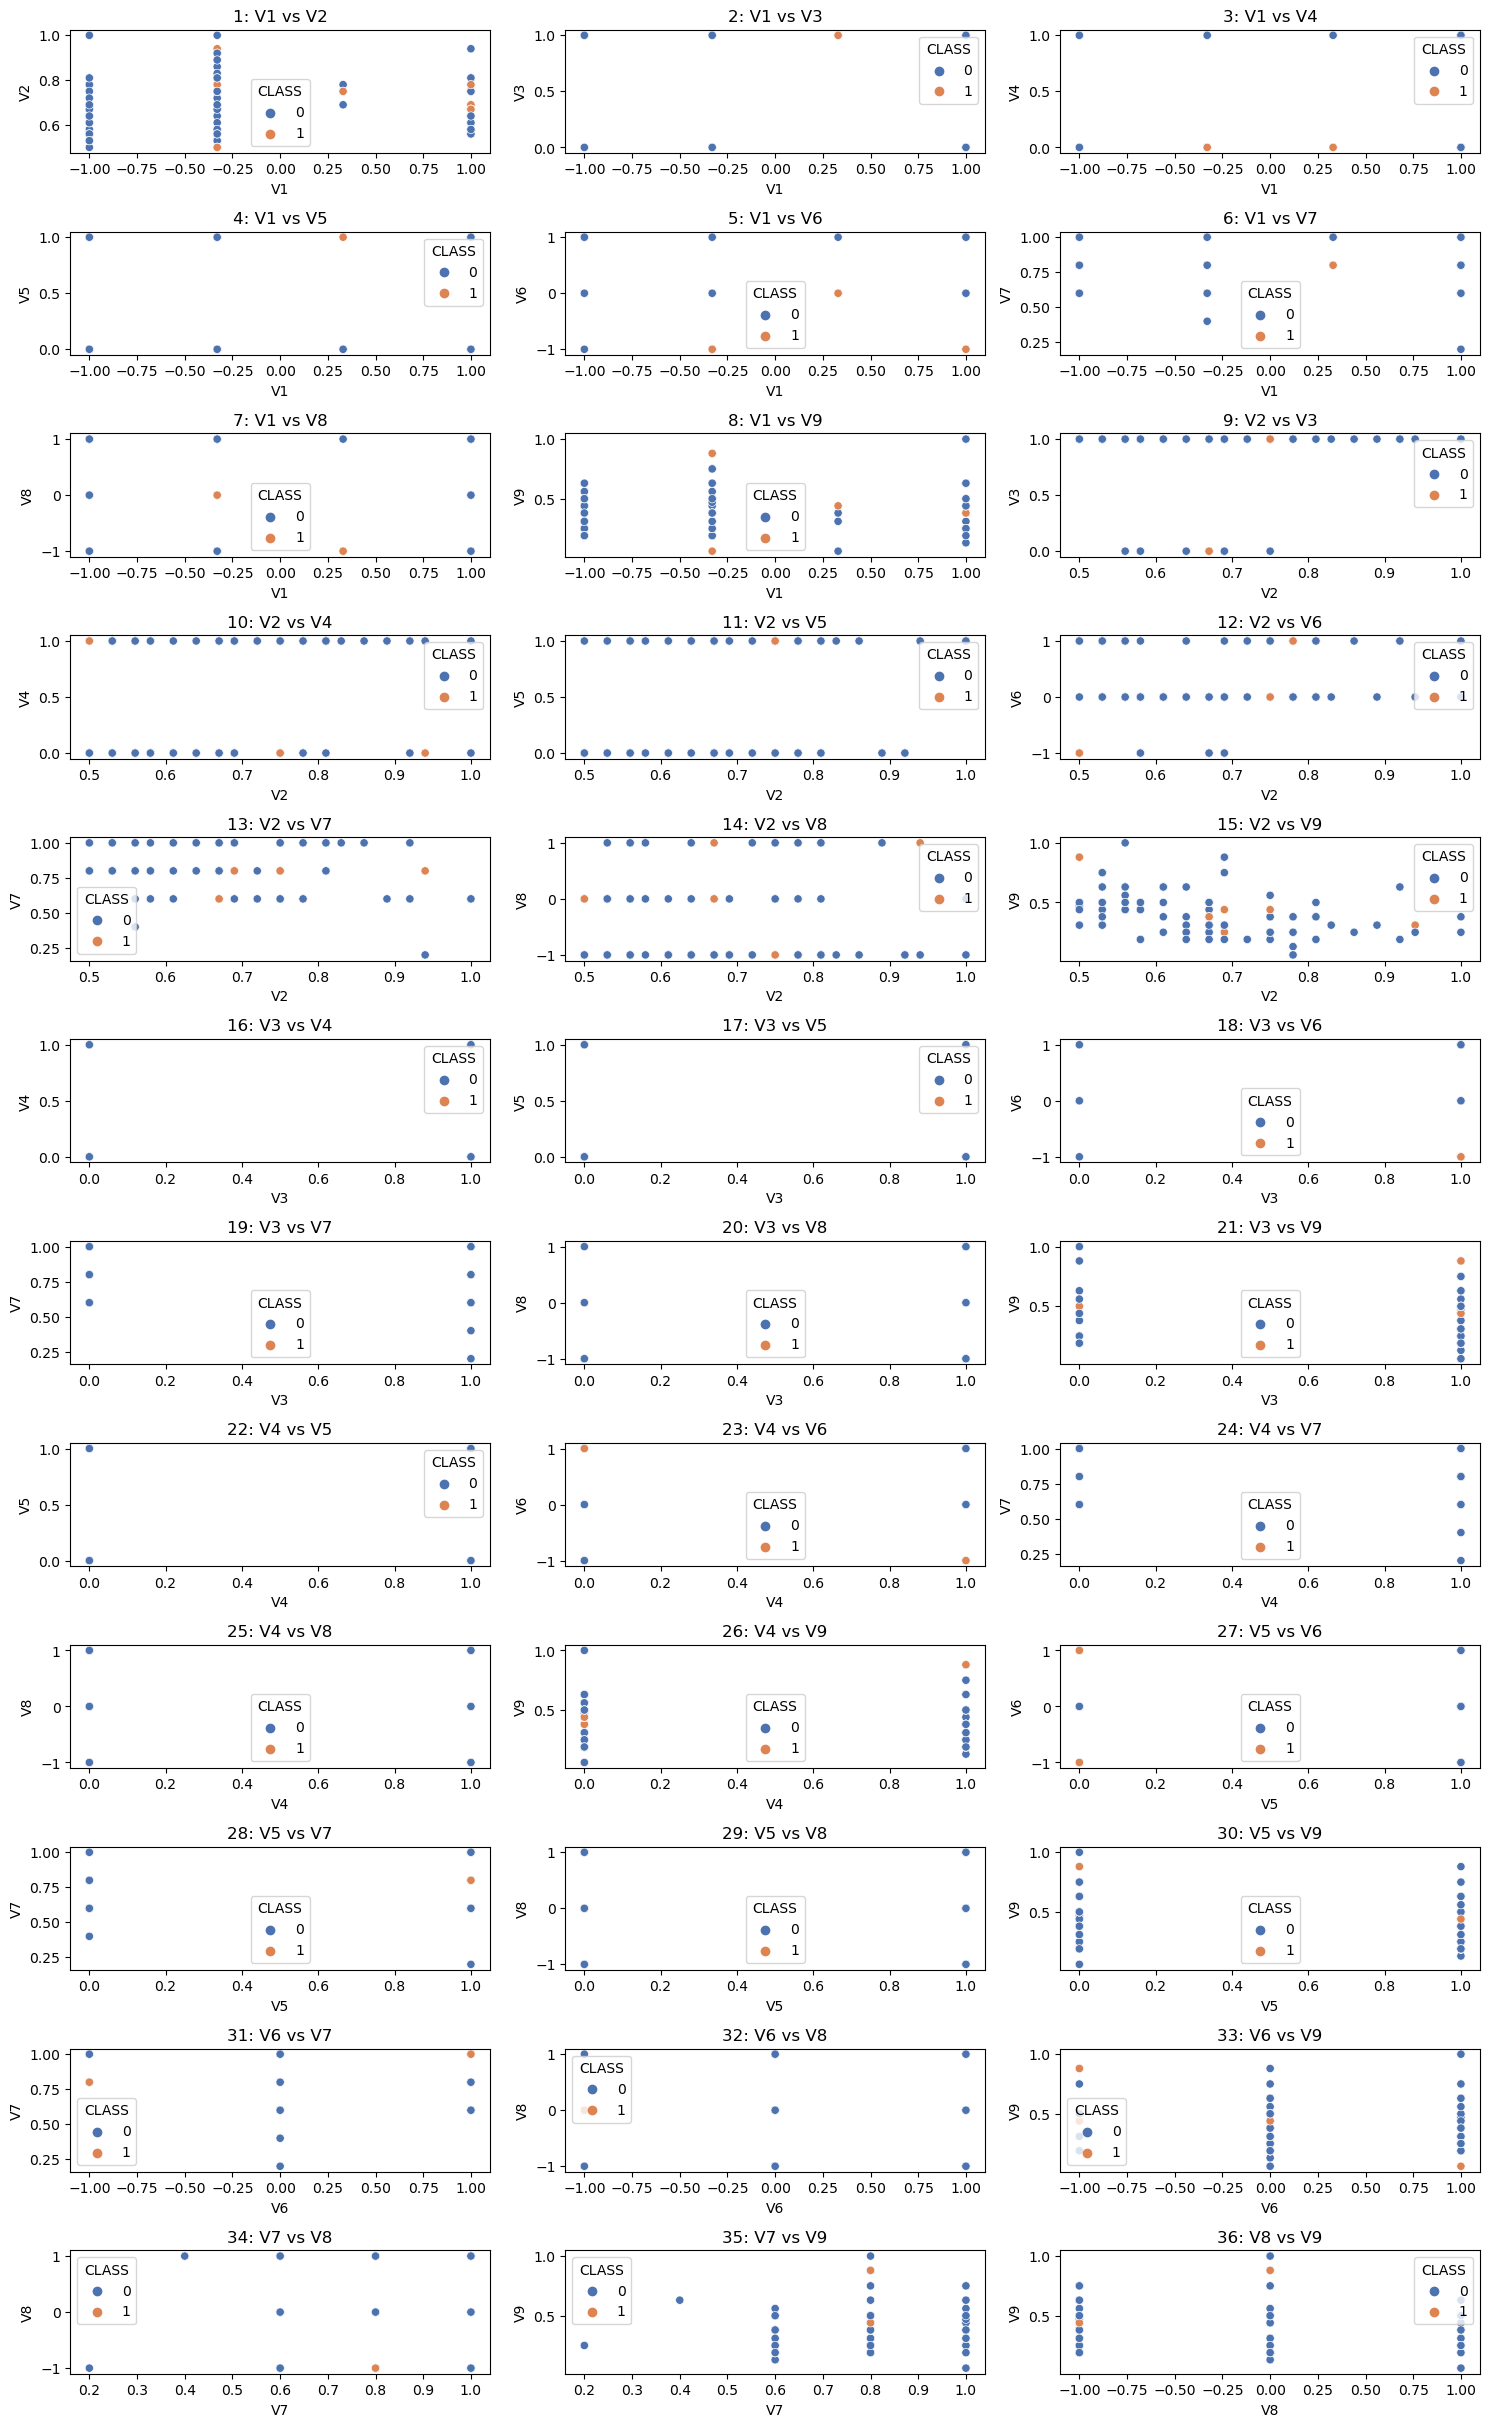

In [21]:
X = df_fertility[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_fertility['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Lupus<a name = "lupus"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [22]:
# Leitura do dataset 'lupus'
df_lupus = pd.read_csv("ds/lupus.csv")

In [23]:
# Visualização de parte do dataset
df_lupus.head()

TIME  CLASS  DURATION   LOG
0   157  alive       1.0  0.69
1   268  alive      10.0  2.40
2   209   dead       2.0  1.10
3   134  alive       0.1  0.10
4    21   dead       0.1  0.10

In [24]:
print(df_lupus.dtypes)

TIME          int64
CLASS        object
DURATION    float64
LOG         float64
dtype: object


Existem 3 features.

### 2. Missing Values

In [25]:
print(df_lupus.isnull().sum())

TIME        0
CLASS       0
DURATION    0
LOG         0
dtype: int64


Não há valores em falta.

### 3. Análise de 'CLASS'

In [26]:
print(df_lupus['CLASS'].unique())

['alive' 'dead']


Vamos mudar a coluna 'CLASS' de modo a que este seja composta por inteiros em vez de objetos.

In [27]:
df_lupus['CLASS'] = df_lupus['CLASS'].map({'alive': 1, 'dead': 0})
print(df_lupus['CLASS'].unique())

[1 0]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [28]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_lupus['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_lupus['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
1    52
0    35
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
1    59.770115
0    40.229885
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [29]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_lupus.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

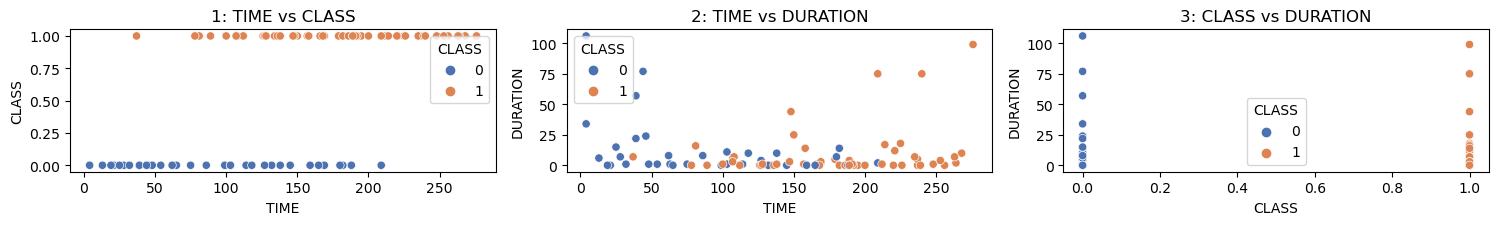

In [30]:
X = df_lupus[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_lupus['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Haberman<a name = "haberman"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [31]:
# Leitura do dataset 'haberman'
df_haberman = pd.read_csv("ds/haberman.csv")

In [32]:
# Visualização de parte do dataset
df_haberman.head()

AGE  YEAR  NODES  CLASS
0   30    64      1      1
1   30    62      3      1
2   30    65      0      1
3   31    59      2      1
4   31    65      4      1

In [33]:
print(df_haberman.dtypes)

AGE      int64
YEAR     int64
NODES    int64
CLASS    int64
dtype: object


Existem 3 features.

### 2. Missing Values

In [34]:
print(df_haberman.isnull().sum())

AGE      0
YEAR     0
NODES    0
CLASS    0
dtype: int64


Não há valores em falta.

### 3. Análise de 'CLASS'

In [35]:
print(df_haberman['CLASS'].unique())

[1 2]


Vamos mudar a coluna 'CLASS' de modo a que este seja composta por [0 1] em vez de [1 2].

In [36]:
df_haberman['CLASS'] = df_haberman['CLASS'].map({1:0, 2:1})
print(df_haberman['CLASS'].unique())

[0 1]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [37]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_haberman['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_haberman['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    225
1     81
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    73.529412
1    26.470588
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [38]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_haberman.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

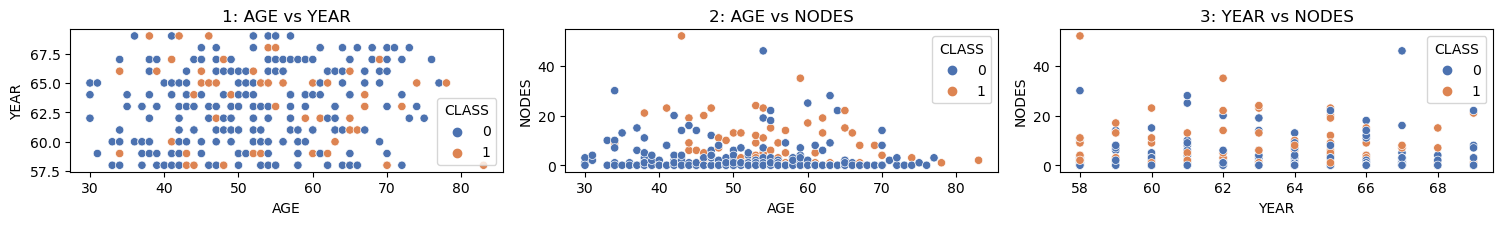

In [39]:
X = df_haberman[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_haberman['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Sa_heart<a name = "heart"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [40]:
# Leitura do dataset 'sa_heart'
df_sa = pd.read_csv("ds/sa_heart.csv")

In [41]:
# Visualização de parte do dataset
df_sa.head()

V1     V2    V3     V4  V5  V6     V7     V8  V9  CLASS
0  160  12.00  5.73  23.11   1  49  25.30  97.20  52      2
1  144   0.01  4.41  28.61   2  55  28.87   2.06  63      2
2  118   0.08  3.48  32.28   1  52  29.14   3.81  46      1
3  170   7.50  6.41  38.03   1  51  31.99  24.26  58      2
4  134  13.60  3.50  27.78   1  60  25.99  57.34  49      2

In [42]:
print(df_sa.dtypes)

V1         int64
V2       float64
V3       float64
V4       float64
V5         int64
V6         int64
V7       float64
V8       float64
V9         int64
CLASS      int64
dtype: object


Existem 9 features.

### 2. Missing Values

In [43]:
print(df_sa.isnull().sum())

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
CLASS    0
dtype: int64


Não há valores em falta.

### 3. Análise de 'CLASS'

In [44]:
print(df_sa['CLASS'].unique())

[2 1]


Vamos mudar a coluna 'CLASS' de modo a que este seja composta por [1 0] em vez de [2 1].

In [45]:
df_sa['CLASS'] = df_sa['CLASS'].map({1:0, 2:1})
print(df_sa['CLASS'].unique())

[1 0]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [46]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_sa['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_sa['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    302
1    160
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    65.367965
1    34.632035
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [47]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_sa.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

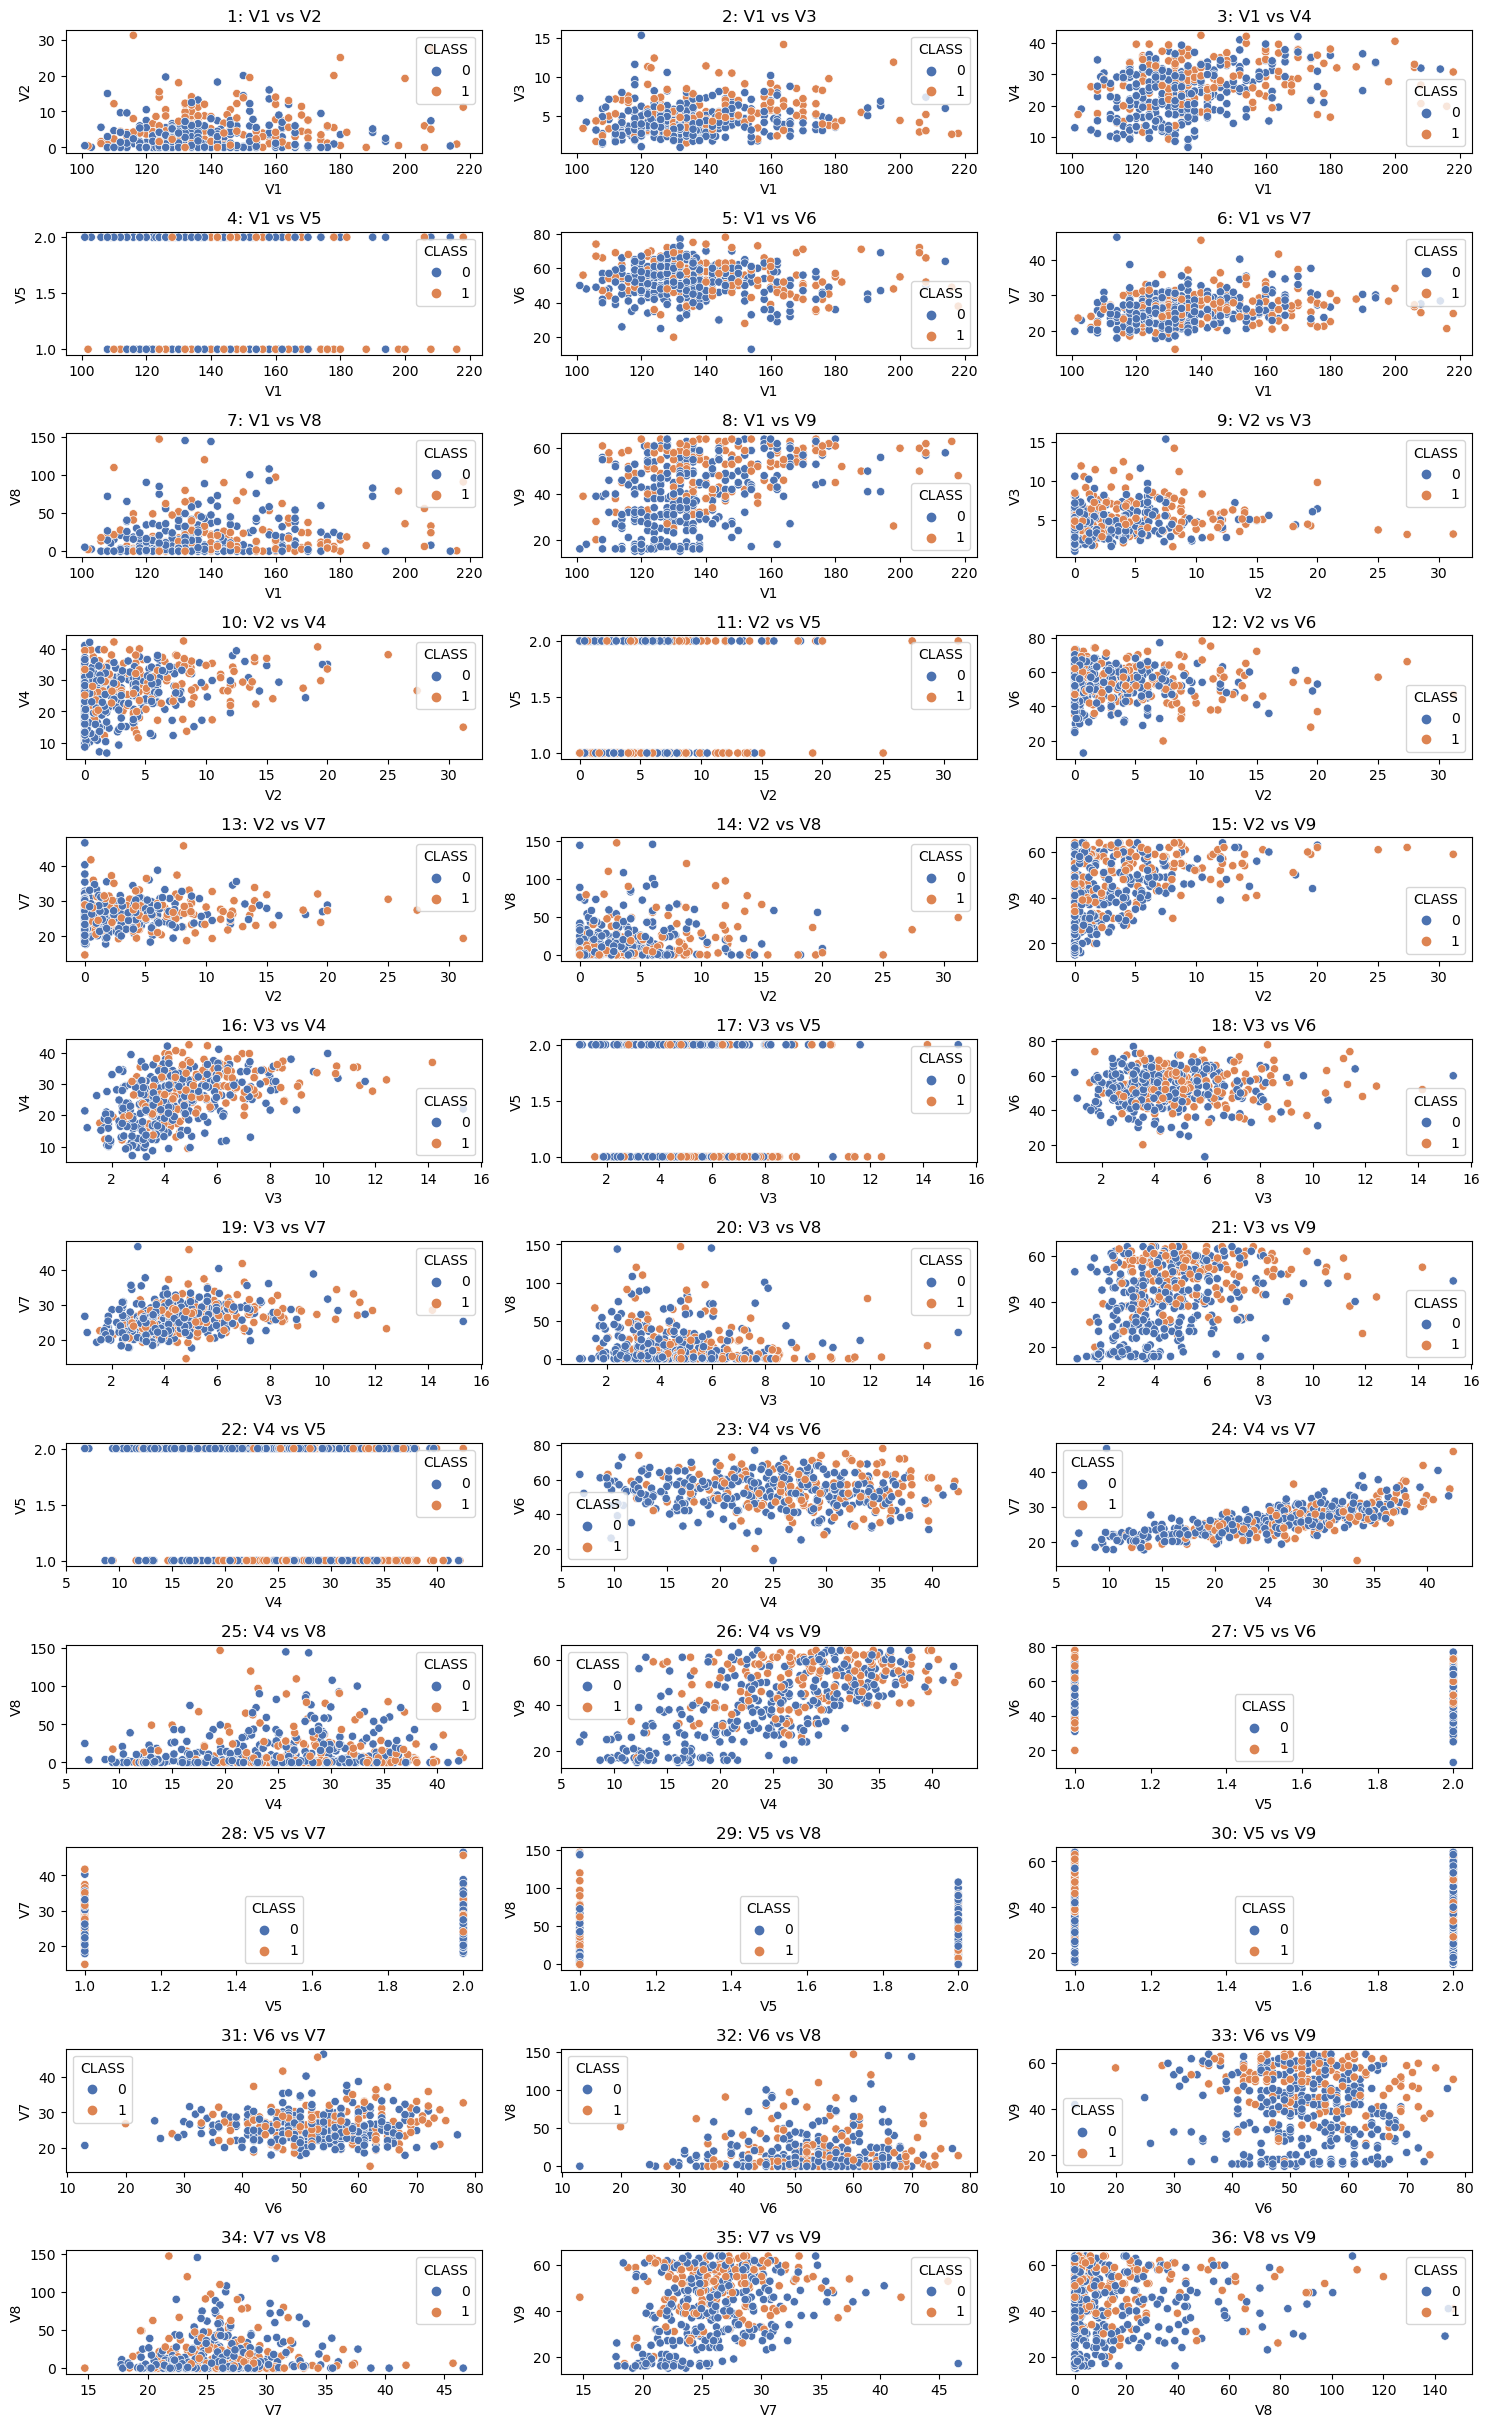

In [48]:
X = df_sa[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_sa['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Liver Disorders<a name = "liver"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [49]:
# Leitura do dataset 'liver-disorders'
df_liver = pd.read_csv("ds/liver-disorders.csv")

In [50]:
# Visualização de parte do dataset
df_liver.head()

DRINKS  MCV  ALKPHOS  SGPT  SGOT  GAMMAGT  CLASS
0      85   92       45    27    31      0.0      1
1      85   64       59    32    23      0.0      2
2      86   54       33    16    54      0.0      2
3      91   78       34    24    36      0.0      2
4      87   70       12    28    10      0.0      2

In [51]:
print(df_liver.dtypes)

DRINKS       int64
MCV          int64
ALKPHOS      int64
SGPT         int64
SGOT         int64
GAMMAGT    float64
CLASS        int64
dtype: object


Existem 6 features.

### 2. Missing Values

In [52]:
print(df_liver.isnull().sum())

DRINKS     0
MCV        0
ALKPHOS    0
SGPT       0
SGOT       0
GAMMAGT    0
CLASS      0
dtype: int64


Não há valores em falta.

### 3. Análise de 'CLASS'

In [53]:
print(df_liver['CLASS'].unique())

[1 2]


Vamos mudar a coluna 'CLASS' de modo a que este seja composta por [0 1] em vez de [1 2].

In [54]:
df_liver['CLASS'] = df_liver['CLASS'].map({1:0, 2:1})
print(df_liver['CLASS'].unique())

[0 1]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [55]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_liver['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_liver['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
1    200
0    145
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
1    57.971014
0    42.028986
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [56]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_liver.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

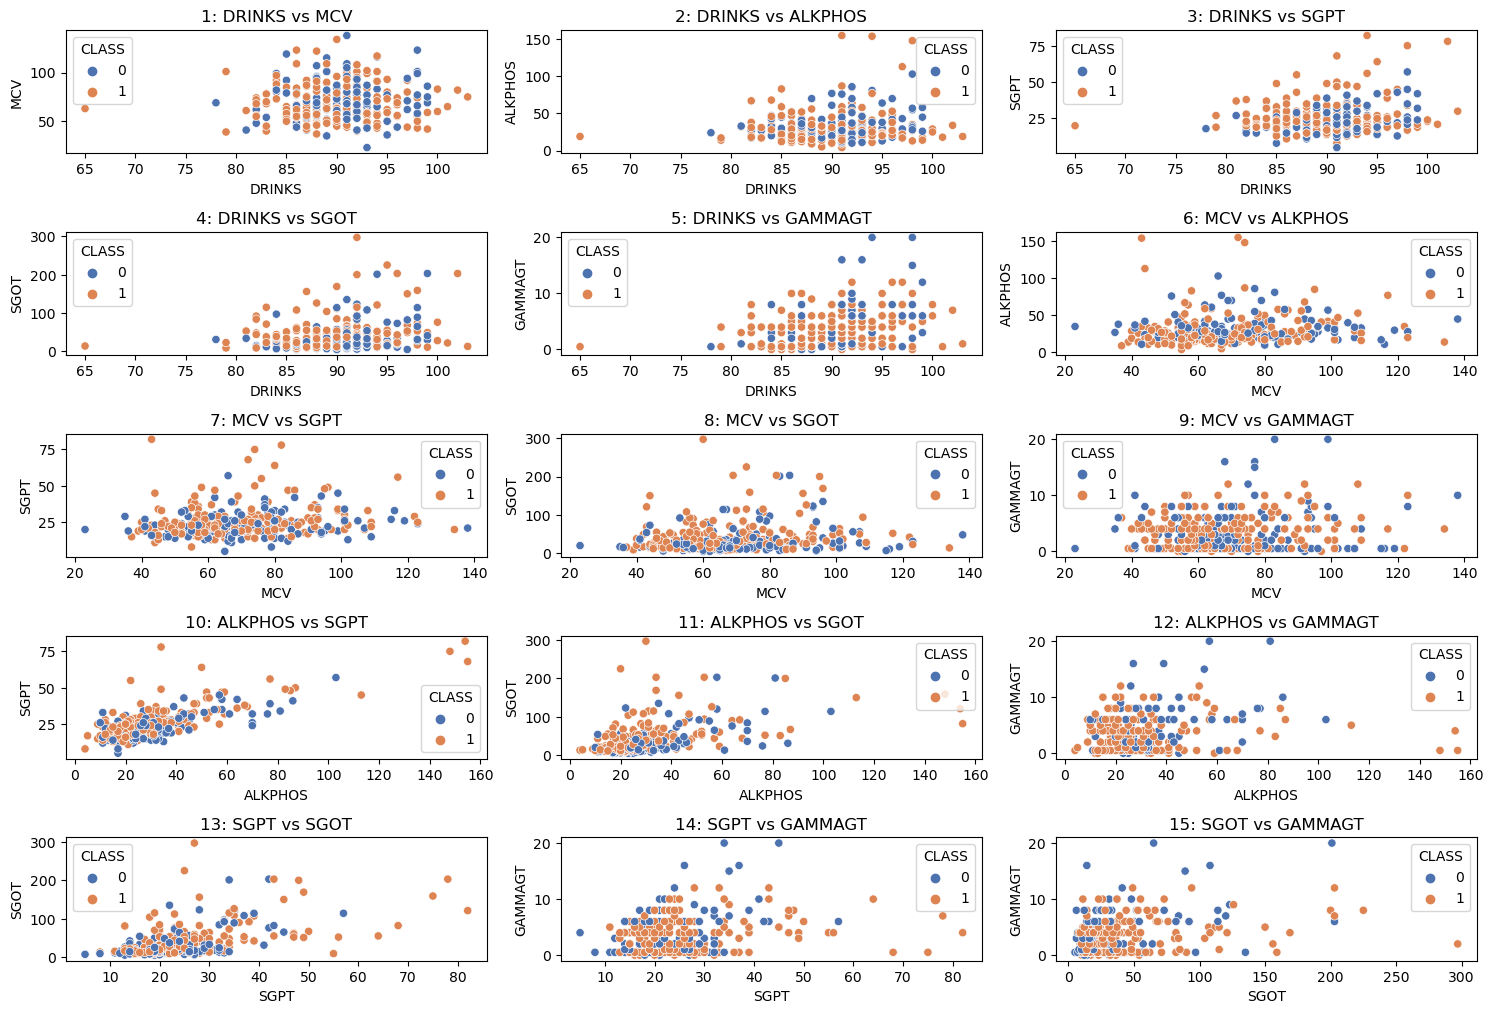

In [57]:
X = df_liver[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_liver['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Blood Transfusion<a name = "blood"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [58]:
# Leitura do dataset 'blood_transfusion'
df_blood=pd.read_csv('ds/blood_transfusion.csv')

In [59]:
# Visualização de parte do dataset
df_blood.head()

V1  V2     V3  V4  CLASS
0   2  50  12500  98      2
1   0  13   3250  28      2
2   1  16   4000  35      2
3   2  20   5000  45      2
4   1  24   6000  77      1

In [60]:
print(df_blood.dtypes)

V1       int64
V2       int64
V3       int64
V4       int64
CLASS    int64
dtype: object


Existem 4 features.

### 2. Missing Values

In [61]:
print(df_blood.isnull().sum())

V1       0
V2       0
V3       0
V4       0
CLASS    0
dtype: int64


Não tem valores em falta.

### 3. Análise de 'CLASS'

In [62]:
print(df_blood.CLASS.unique())

[2 1]


Vamos mudar a coluna 'CLASS' de modo a que este seja composta por [1 0] em vez de [2 1].

In [63]:
df_blood['CLASS'] = df_blood['CLASS'].map({1:0, 2:1})
print(df_blood.CLASS.unique())

[1 0]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [64]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_blood['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_blood['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    570
1    178
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    76.203209
1    23.796791
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [65]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_blood.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

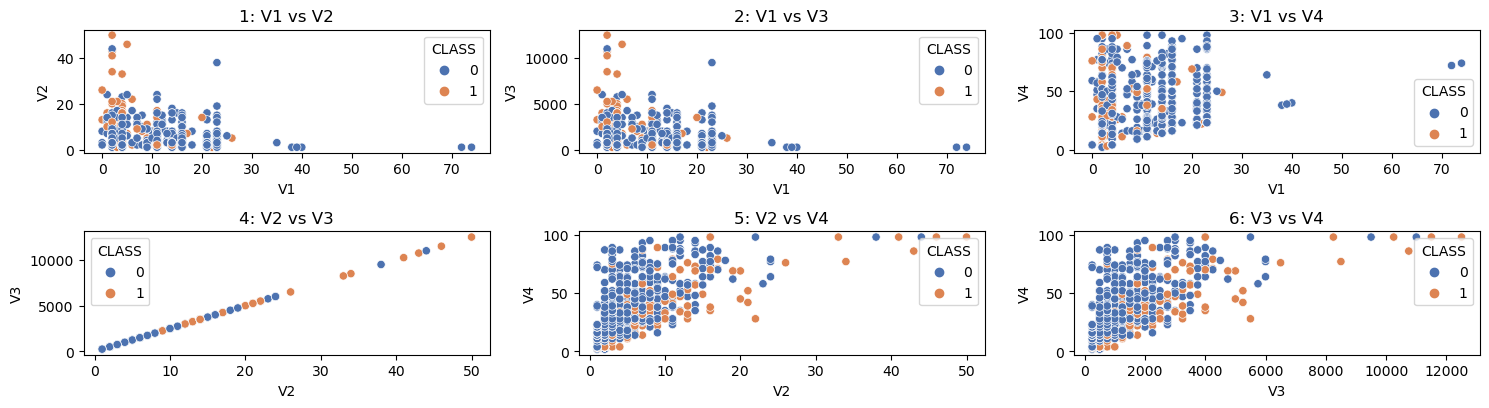

In [66]:
X = df_blood[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_blood['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Breast_w<a name = "breast"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [67]:
# Leitura do dataset 'haberman'
df_breast=pd.read_csv('ds/breast_w.csv')

In [68]:
# Visualização de parte do dataset
df_breast.head()

CLUMP  SIZE  SHAPE  ADHESION  EPI_SIZE NUCLEI  CHROMATIN  NUCLEOLI  \
0      5     1      1         1         2      1          3         1   
1      5     4      4         5         7     10          3         2   
2      3     1      1         1         2      2          3         1   
3      6     8      8         1         3      4          3         7   
4      4     1      1         3         2      1          3         1   

   MITOSES   CLASS  
0        1  benign  
1        1  benign  
2        1  benign  
3        1  benign  
4        1  benign

In [69]:
print(df_breast.dtypes)

CLUMP         int64
SIZE          int64
SHAPE         int64
ADHESION      int64
EPI_SIZE      int64
NUCLEI       object
CHROMATIN     int64
NUCLEOLI      int64
MITOSES       int64
CLASS        object
dtype: object


Existem 9 features.

### 2. Missing Values

In [70]:
print(df_breast.isnull().sum())

CLUMP        0
SIZE         0
SHAPE        0
ADHESION     0
EPI_SIZE     0
NUCLEI       0
CHROMATIN    0
NUCLEOLI     0
MITOSES      0
CLASS        0
dtype: int64


Vemos que nenhuma das colunas apresenta missing values detetados pelo método '.isnull()'. No entanto, é possível confirmar em OpenML que efetivamente existem dados em falta. Tomamos então a hipótese de que, aquando da criação deste dataset, os seus autores substituíram os valores em falta com algum caractere especial. Vamos então analisar os conteúdos da coluna NUCLEI (está flagged em OpenML como sendo problemática):

In [71]:
print(df_breast.NUCLEI.unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


Substituir todas as ocorrências de '?' por NaN (usando numpy) e de seguida removê-las do dataframe:

In [72]:
print("Antes: \n", df_breast.NUCLEI.unique())
df_breast = df_breast.replace('?', np.nan).dropna()

print("Depois: \n",df_breast.NUCLEI.unique())

Antes: 
 ['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Depois: 
 ['1' '10' '2' '4' '3' '9' '7' '5' '8' '6']


No caso de NUCLEI, basta passar o valor para int(valor:)

In [73]:
df_breast['NUCLEI'] = df_breast['NUCLEI'].map(int)
print(df_breast.NUCLEI.unique())

[ 1 10  2  4  3  9  7  5  8  6]


### 3. Análise de 'CLASS'

In [74]:
print(df_breast.CLASS.unique())

['benign' 'malignant']


Vamos mudar a coluna 'CLASS' de modo a substituir 'benign' por 0 e 'malignant' por 1:

In [75]:
df_breast['CLASS'] = df_breast['CLASS'].map({'benign':0, 'malignant':1})
print(df_breast.CLASS.unique())

[0 1]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [76]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_breast['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_breast['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    444
1    239
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    65.007321
1    34.992679
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [77]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_breast.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

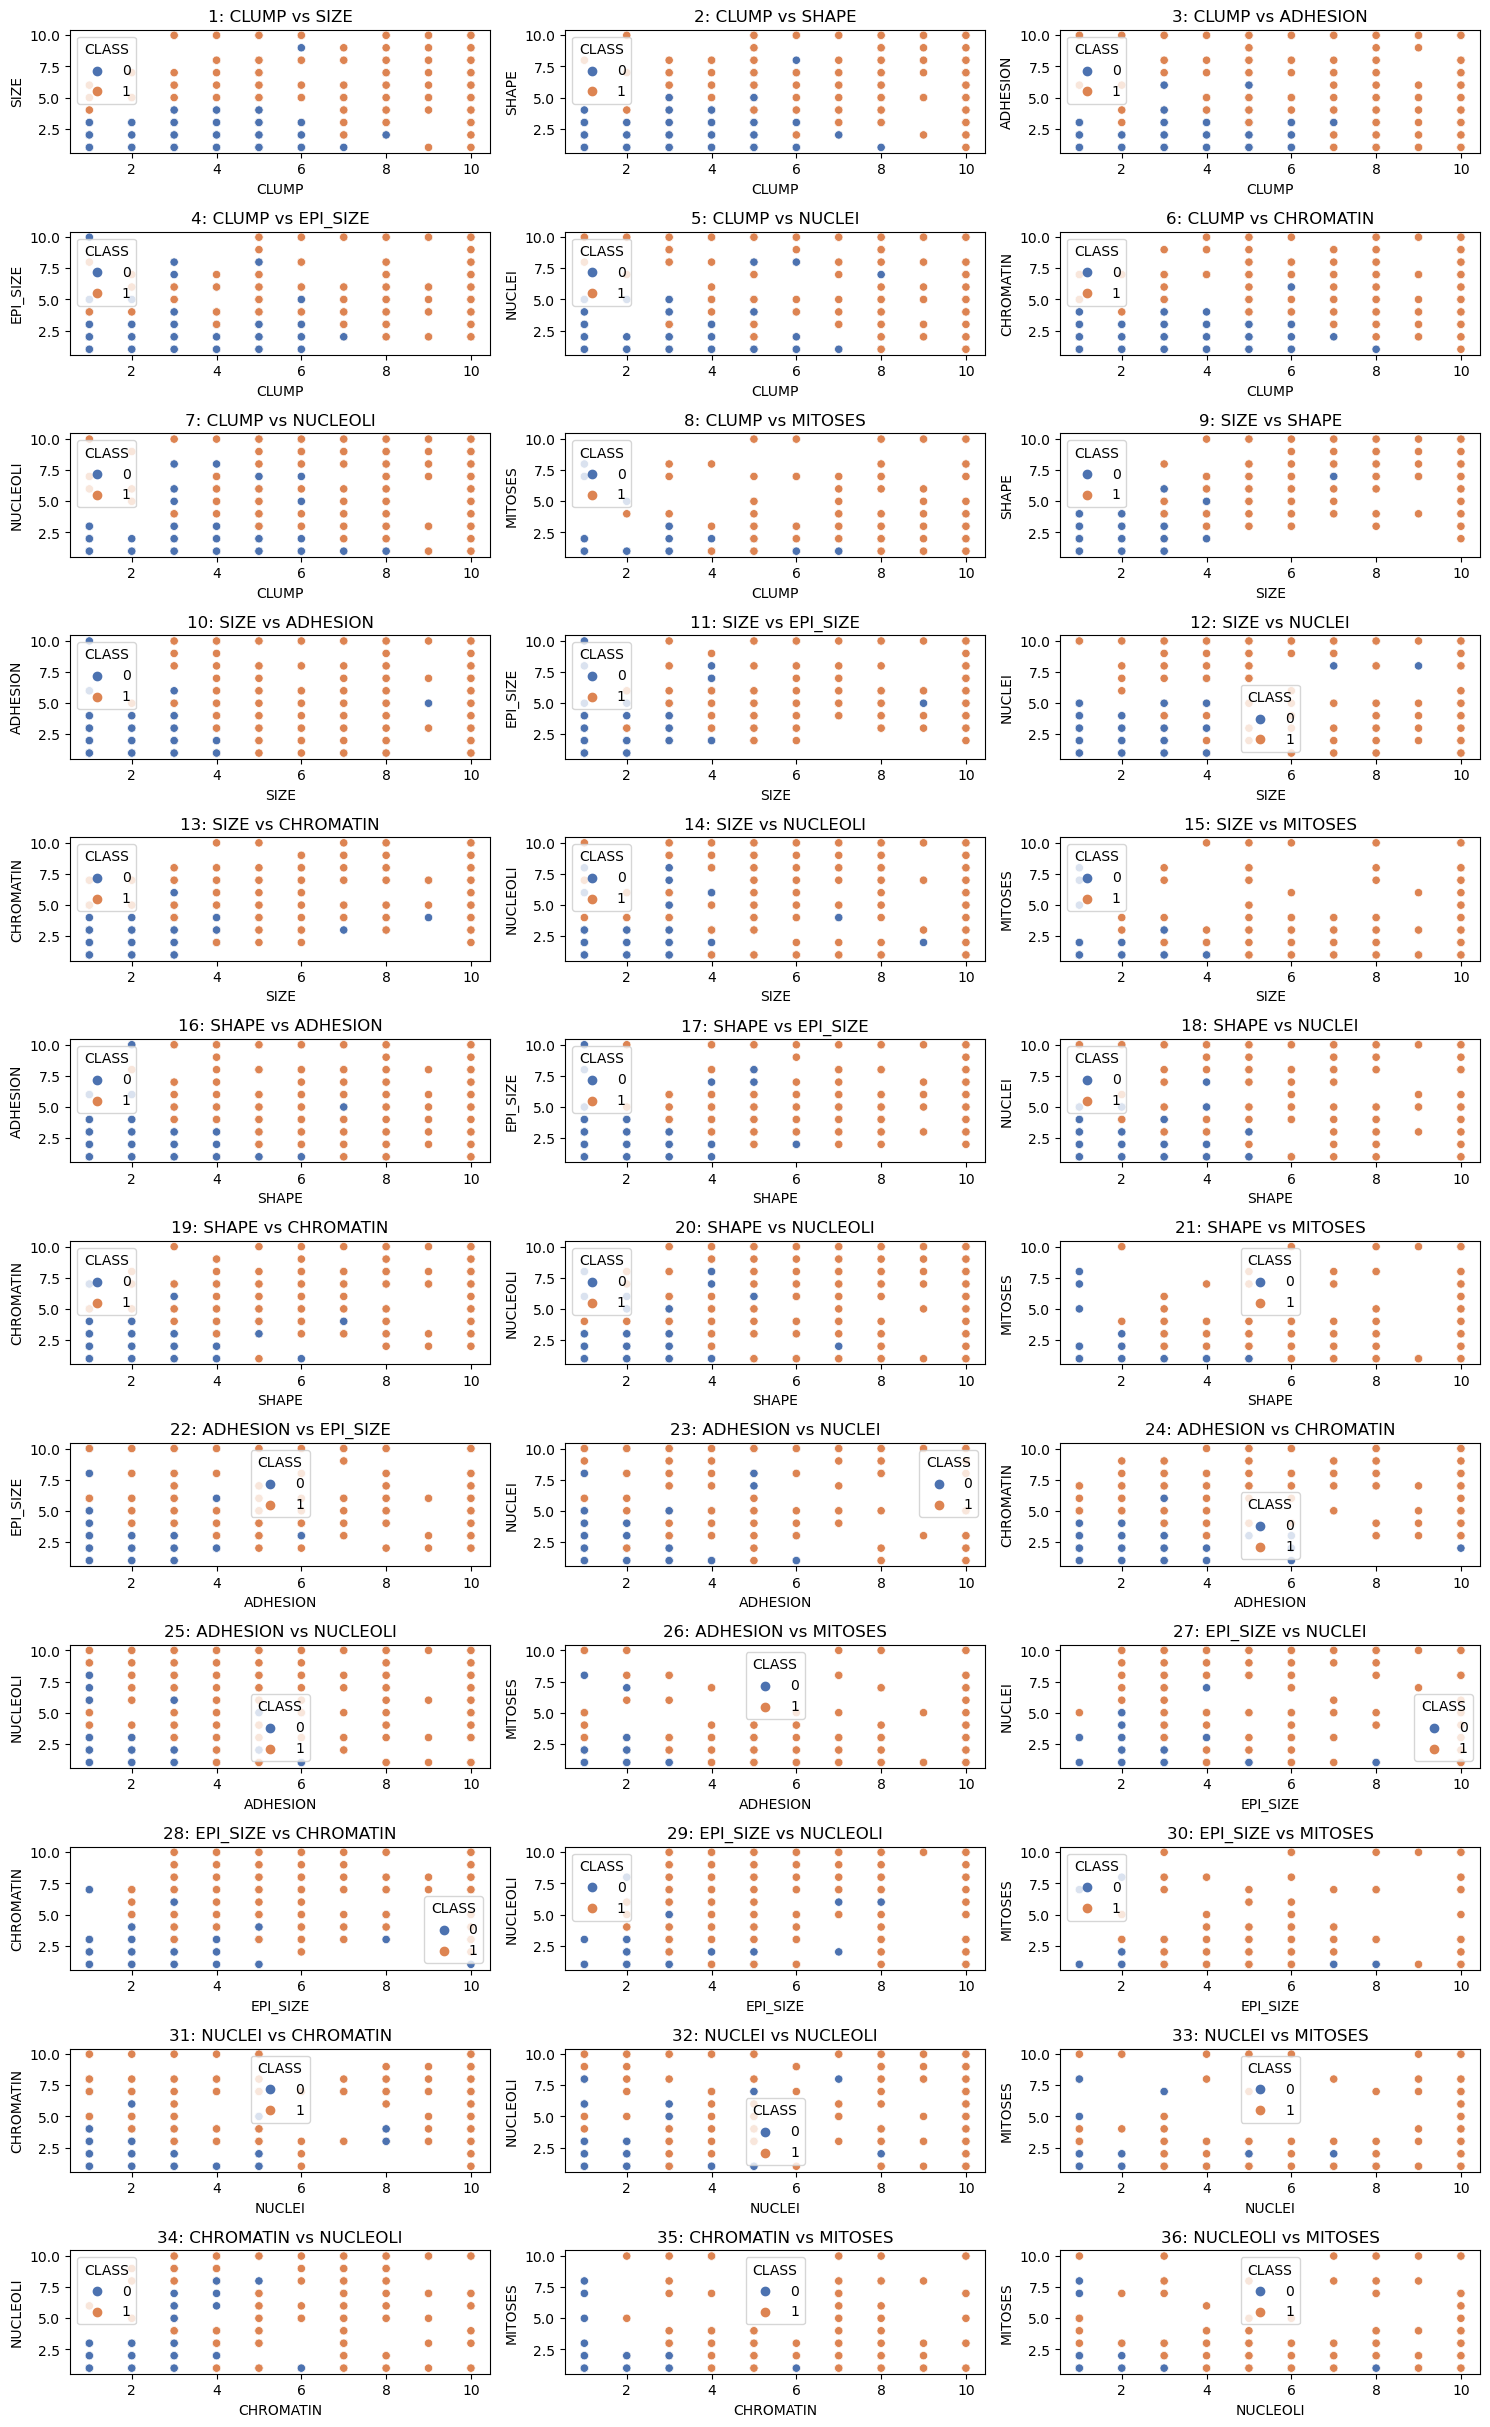

In [78]:
X = df_breast[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_breast['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Diabetes<a name = "diabetes"></a>
[[voltar ao índice]](#indice)

### 1. Análise Geral dos Dados

In [79]:
# Leitura do dataset 'diabetes'
df_diabetes=pd.read_csv('ds/diabetes.csv')

In [80]:
# Visualização de parte do dataset
df_diabetes.head()

PREG  PLAS  PRES  SKIN  INSU  MASS   PEDI  AGE            CLASS
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

In [81]:
print(df_diabetes.dtypes)

PREG       int64
PLAS       int64
PRES       int64
SKIN       int64
INSU       int64
MASS     float64
PEDI     float64
AGE        int64
CLASS     object
dtype: object


Existem 8 features.

### 2. Missing Values

In [82]:
print(df_diabetes.isnull().sum())

PREG     0
PLAS     0
PRES     0
SKIN     0
INSU     0
MASS     0
PEDI     0
AGE      0
CLASS    0
dtype: int64


Não há valores em falta.

### 3. Análise de 'CLASS'

In [83]:
print(df_diabetes['CLASS'].unique())

['tested_positive' 'tested_negative']


Vamos mudar a coluna 'CLASS' de modo a atribuir 1 a 'tested_positive' e 0 a 'tested_negative':

In [84]:
df_diabetes['CLASS']=df_diabetes['CLASS'].map({'tested_positive':1, 'tested_negative':0})
print(df_diabetes.CLASS.unique())

[1 0]


### 4. Classes Desbalanceadas

Vamos agora ver se a classe target, neste caso denominada de 'CLASS', possui ou não uma distribuição equilibrada de valores:

In [85]:
print("\n - Quantos valores possui cada uma das 3 classes?")
print(df_diabetes['CLASS'].value_counts())

print("\n\n - Posto isto, qual é a proporção de dados de cada classe?")
print(df_diabetes['CLASS'].value_counts(normalize = True) * 100)


 - Quantos valores possui cada uma das 3 classes?
0    500
1    268
Name: CLASS, dtype: int64


 - Posto isto, qual é a proporção de dados de cada classe?
0    65.104167
1    34.895833
Name: CLASS, dtype: float64


### 5. Visualização dos dados

In [86]:
# Estamos a criar todas as possiveis junções de 2 atributos sem que se repetitam.
colunas = df_diabetes.columns[:-1]
combinacoes = list(itertools.combinations(colunas, 2))

Passamos agora então para a visualização dos dados através de scatterplots:

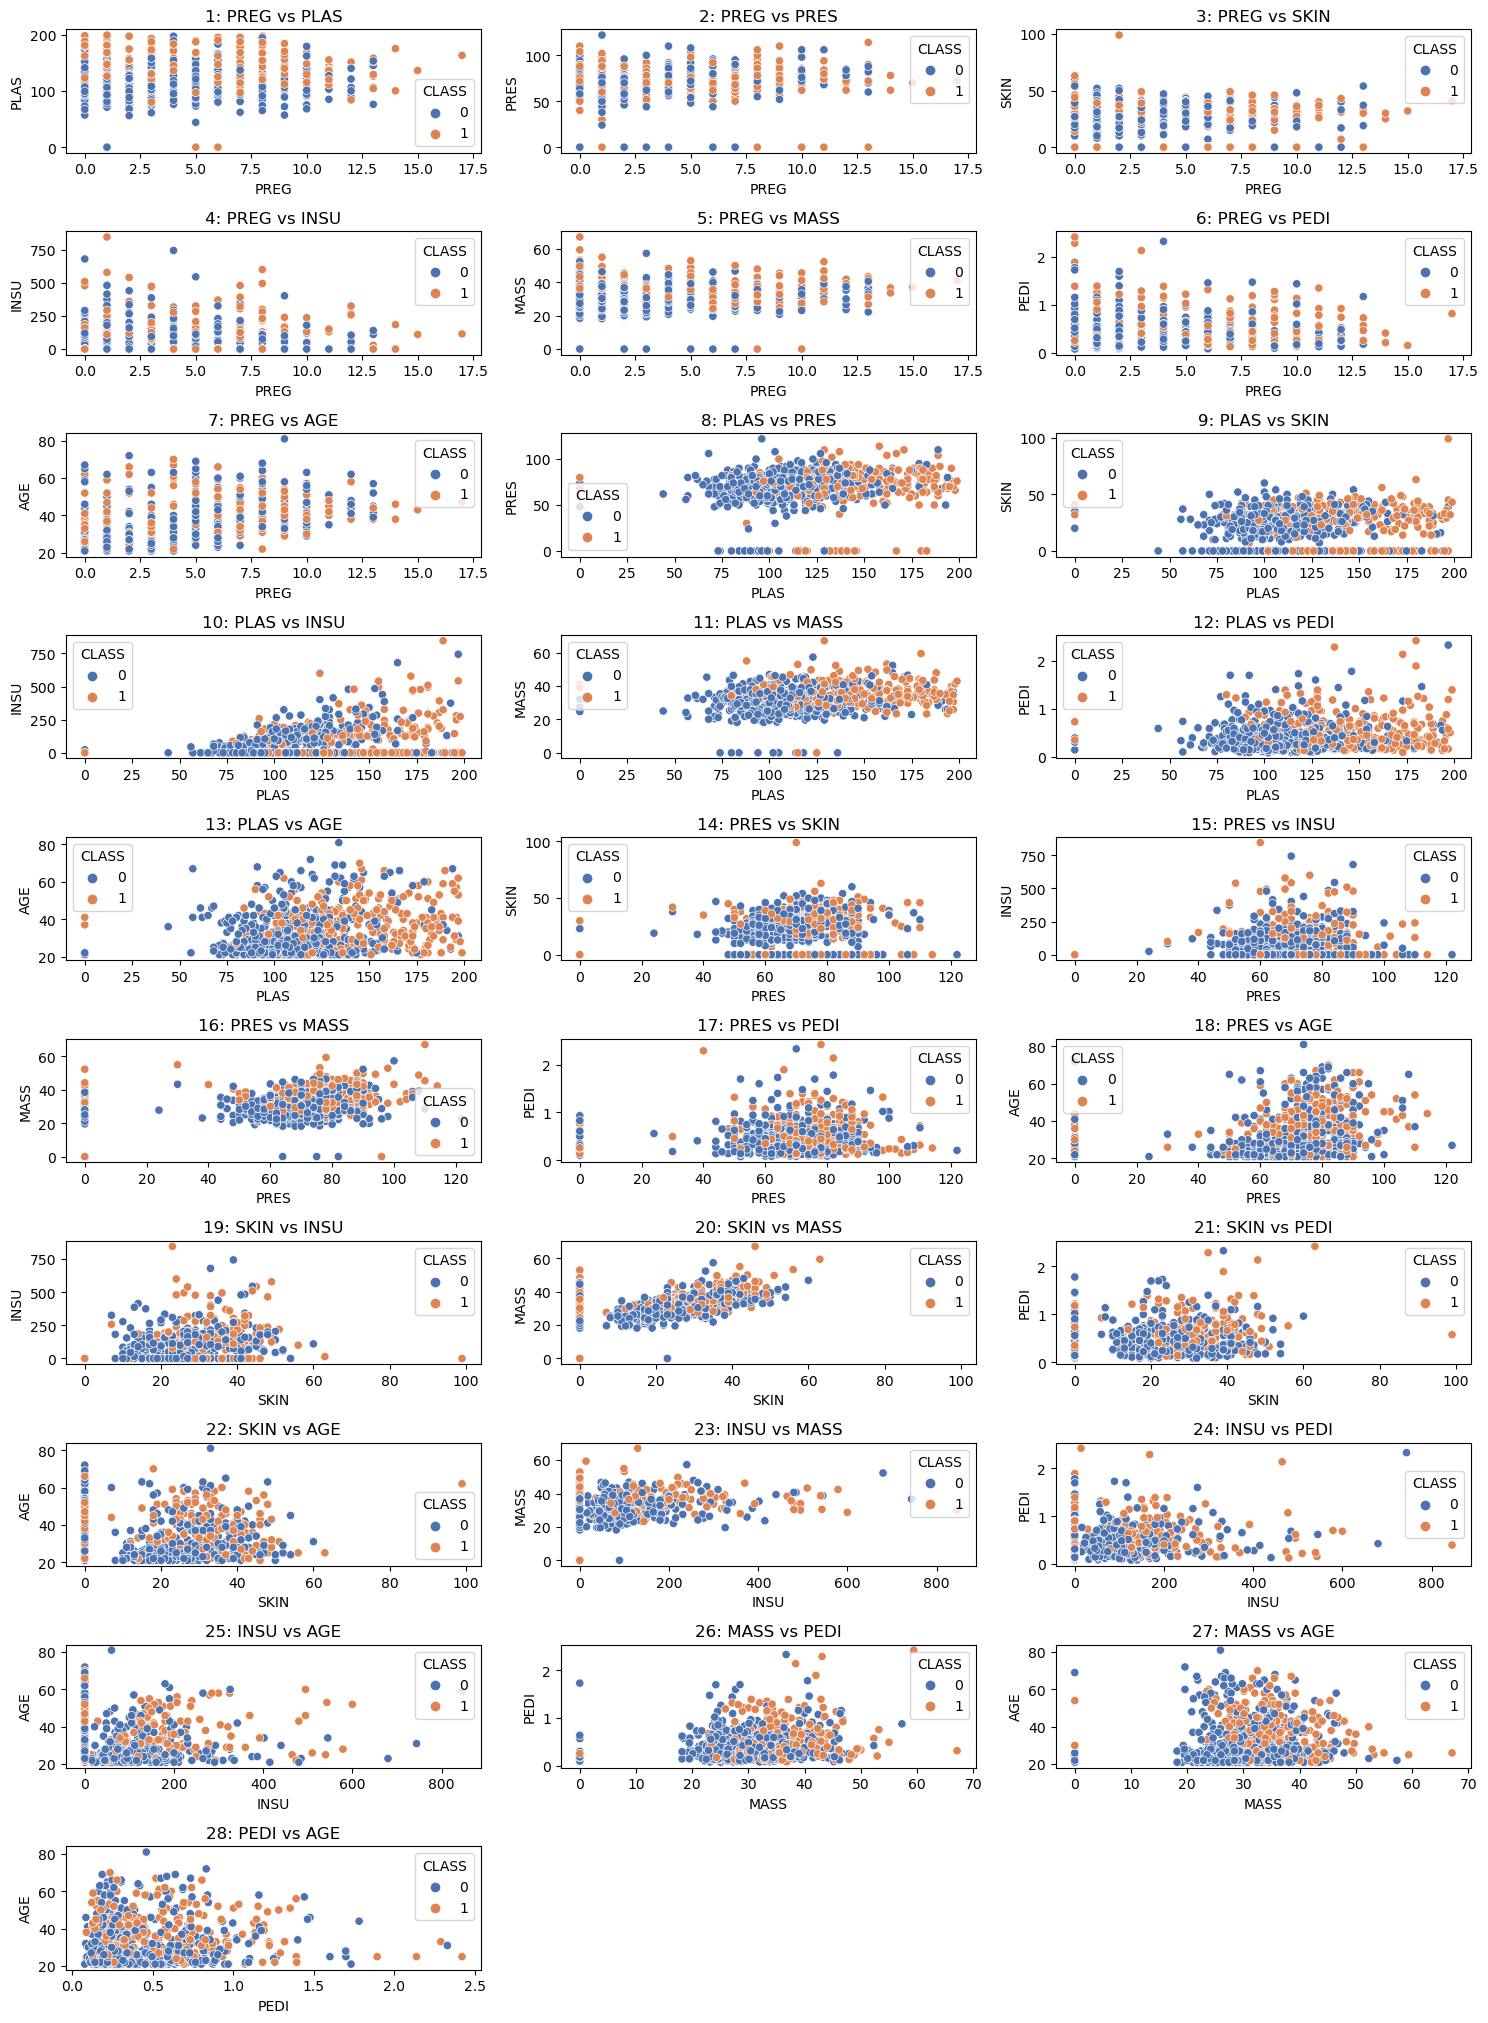

In [87]:
X = df_diabetes[colunas]
# Define o tamanho da figura
plt.figure(figsize = (15, 30))

# Gera todas as combinações possíveis de pares de atributos
combinacoes = list(itertools.combinations(colunas, 2))

# Cria os scatterplots em gráficos individuais
for i, (x, y) in enumerate(combinacoes):
    plt.subplot(15, 3, i + 1)
    sns.scatterplot(x = X[x], y = X[y], hue = df_diabetes['CLASS'], palette = "deep")
    plt.title(f'{i+1}: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)  
    
# Ajusta o layout
plt.tight_layout()

# Mostra os scatterplots
plt.show()

## Conclusão da Limpeza de Dados<a name = "conclusao"></a>
[[voltar ao índice]](#indice)

Após esta breve análise dos dataframes selecionados e correção de problemas, conseguimos produzir dataframes limpos, sabendo que todos possuem **classe target desbalanceada**, pelo que será esse o obstáculo que estamos determinados a superar.

Posto isto, resta apenas exportar os dados limpos para ficheiros .csv que serão usados ao longo do projeto:

In [88]:
df_blood.to_csv('clean_ds\\blood_transfusion.csv', index=False)
df_liver.to_csv('clean_ds\\liver_disorders.csv', index=False)
df_weather.to_csv('clean_ds\\weather.csv', index=False)
df_fertility.to_csv('clean_ds\\fertility.csv', index=False)
df_haberman.to_csv('clean_ds\\haberman.csv', index=False)
df_diabetes.to_csv('clean_ds\diabetes.csv', index=False)
df_breast.to_csv('clean_ds\\breast_w.csv', index=False)
df_lupus.to_csv('clean_ds\\lupus.csv', index=False)
df_sa.to_csv('clean_ds\\sa_heart.csv', index=False)